# Import & Installs

In [2]:
!pip install geopandas 

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   -- ------------------------------------- 1.0/16.2 MB 6.1 MB/s eta 0:00:03
   ----- ---------------------------------- 2.1/16.2 MB 6.7 MB/s eta 0:00:03
   ---------- ----------------------------- 4.2/16.2 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 4.5/16.2 MB 6.9 MB/s eta 0:00:02
   ------------- -------------------------- 5.5/16.2 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 6.3/16.2 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 6.8/16.2 MB 5.0 MB/s eta 0:00:02
   ------------------ --------------------- 7.6/16.2 MB 4.7 MB/s eta 0:00:02
   ---------------------- ----------------- 8.9/16.2 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 9.2/16.2 MB 4.9 MB/s eta 0:00:02
   ------------------------- -------------- 10.2/16.2 MB 4.6 MB/s eta 0:00:02
   --------------------------- ------------ 11.0/16.2 MB 4.5 MB/s eta 0:00:02
   -

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import requests
import time
import importlib
import geopandas as gpd
import os

## Custom Module.Class Imports

In [194]:

#First, ensure that the 'dfclasses' folder is within the main directory that contains all other
##project files.
import dfclasses.dfedit
from dfclasses.dfedit import dfedit
from dfclasses.dfedit import visual

In [195]:
#Reloading custom modules if updated:
importlib.reload(dfclasses.dfedit)
from dfclasses.dfedit import dfedit
from dfclasses.dfedit import visual

# Data Retrieval
IMPORTANT<br>
Don't run this again after the first time unless you wish to reset the database transformation and get the raw data.

In [17]:
from config import APP_KEY
#This config file containing the APP_KEY is set to be ignored.
#Please see below to setup your own app_key.

In [18]:
#We have to retrieve all data in one instance because offsetting messes with the violation_date and repeats data
#The site seems to work very weird with offsets.
LIMIT = 53679
URL = f"https://data.cityofnewyork.us/resource/5fn4-dr26.json?$query=SELECT%0A%20%20%60record_id%60%2C%0A%20%20%60certificate_number%60%2C%0A%20%20%60business_name%60%2C%0A%20%20%60violation_date%60%2C%0A%20%20%60industry%60%2C%0A%20%20%60borough%60%2C%0A%20%20%60charge%60%2C%0A%20%20%60charge_count%60%2C%0A%20%20%60outcome%60%2C%0A%20%20%60counts_settled%60%2C%0A%20%20%60counts_guilty%60%2C%0A%20%20%60counts_not_guilty%60%2C%0A%20%20%60building_number%60%2C%0A%20%20%60street%60%2C%0A%20%20%60street_2%60%2C%0A%20%20%60unit_type%60%2C%0A%20%20%60unit%60%2C%0A%20%20%60description%60%2C%0A%20%20%60city%60%2C%0A%20%20%60state%60%2C%0A%20%20%60zip%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60latitude%60%0AWHERE%0A%20%20caseless_one_of(%60state%60%2C%20%22NY%22)%0A%20%20AND%20(%60violation_date%60%0A%20%20%20%20%20%20%20%20%20BETWEEN%20%222022-01-01T23%3A12%3A55%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20%20%20%20%20%20AND%20%222024-12-01T23%3A12%3A55%22%20%3A%3A%20floating_timestamp)%20LIMIT%20{LIMIT}"
APP_TOKEN = APP_KEY
#App token is retrieved after you created it in your NYCOPENDATA account. Access it through developer tool tab.
#Remember to use app token and not api token!
#https://data.cityofnewyork.us/

all_data = pd.DataFrame([])
temp_df = pd.DataFrame()

headers = {
  "X-App-Token": APP_TOKEN
}

In [19]:
#This will request the data based on a query for violations
## between dates of 2022 to 2023 (nothing exists yet for 2024 in NY)
#Note that this might take some time depending on the server, rate limit, & your internet connection.

with requests.Session() as session:
    response = session.get(URL, headers=headers)
    data = response.json()
    temp_df = pd.DataFrame(data)
    all_data = pd.concat([all_data, temp_df], ignore_index=True)
    print(f"Successfully retrieved {LIMIT} rows.")


dcwp_df = all_data.copy()

Successfully retrieved 53679 rows.


# Data Exploration

In [196]:
#Run this to reset data back to its raw form.
dcwp_df = all_data.copy()

In [21]:
#Run this to save the current edit of the data as 'dcwp_df' in your directory.
#This allows you to start off where you left it next time.
dcwp_df.to_csv('dcwp_df', index=False)

In [3]:
#IMPORTANT - DONT RUN THIS IF YOU'D LIKE TO GET THE RAW DATA FROM REQUEST
## AND MAKE A FRESH RUN THROUGH ON CLEANING & TRANSFORMATION PROCESS BELOW.

#Set the directory to where ever you have dcwp_df saved.
#Run this only if you have an edited dataframe you want to save to start from later.
#This avoids the need to request data from the server everytime. 
dcwp_df = pd.read_csv("C:/Users/Yuche/Desktop/CIS-3120-DCWP/dcwp_df")

In [197]:
dcwp_df

,record_id,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,...,state,zip,longitude,latitude,counts_settled,counts_not_guilty,description,unit_type,unit,street_2
0,356-2022-ENFO,22T00008,GREEN APPLE SMOKES CORP,2022-01-03T00:00:00.000,Electronic Cigarette Dealer,Manhattan,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Default Decision,1,...,NY,10010,-77.51985451055077,40.11248891483405,NaN,NaN,NaN,NaN,NaN,NaN
1,21843-2021-CMPL,22Q00008,AKSHAR 108 INC.,2022-01-03T00:00:00.000,Grocery-Retail - 808,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,Pleaded,NaN,...,NY,11375,-73.84940385587548,40.73257426408061,2,NaN,NaN,NaN,NaN,NaN
2,137-2022-ENFO,22Q00005,NIKHANTH DELI INC,2022-01-03T00:00:00.000,Electronic Cigarette Dealer,Queens,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Pleaded,NaN,...,NY,11366,-77.5198538762455,40.11248889282757,1,NaN,NaN,NaN,NaN,NaN
3,962-2022-ENFO,22T00003,ASTORIA CLOUDS CORP.,2022-01-03T00:00:00.000,Tobacco Retail Dealer,Queens,NYC Admin Code § 20-202(a)(1) - BUSINESS ENGAG...,1,Pleaded,NaN,...,NY,11105,-77.51985425603046,40.11248901002469,1,NaN,NaN,NaN,NaN,NaN
4,150-2022-ENFO,22X00007,180 LA DELI GROCERY CORP,2022-01-03T00:00:00.000,Tobacco Retail Dealer,Bronx,NY Pub Health § 1399-GG(2)(C) - OFFERING FOR ...,1,Pleaded,NaN,...,NY,10456,-77.51985427555108,40.112489174989165,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53674,38254-2023-ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21T00:00:00.000,Electronic Cigarette Dealer,Brooklyn,NY Pub Health § 1399-MM1(2) - Selling or offer...,1,NaN,NaN,...,NY,11223,-77.51985446651004,40.11248854401521,NaN,NaN,NaN,NaN,NaN,NaN
53675,38254-2023-ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21T00:00:00.000,Electronic Cigarette Dealer,Brooklyn,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,NaN,NaN,...,NY,11223,-77.51985446651004,40.11248854401521,NaN,NaN,NaN,NaN,NaN,NaN
53676,38277-2023-ENFO,23M01640,"THE JUICE PRESS, LLC",2023-07-21T00:00:00.000,Grocery-Retail - 808,Manhattan,6 RCNY § 5-37 - REFUND POLICY IS NOT POSTED A...,1,NaN,NaN,...,NY,10011,-77.51985456343199,40.112488908370295,NaN,NaN,NaN,NaN,NaN,NaN
53677,38268-2023-ENFO,23Q00955,DERMAMIRACLE AESTHETICS CORP,2023-07-21T00:00:00.000,Salons And Barbershop - 841,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,NaN,NaN,...,NY,11377,-77.51985424425608,40.11248893746478,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
#Rerun as necessary once dcwp_df has been cleaned and transformed.
dcwpdata = dfedit(dcwp_df)

In [199]:
#Getting a general view of all column and their total NaN counts.
#Good to refer to when ensuring all meaningless NaN values are taken care of.
dcwpdata.count_na()

record_id has 0 NaN values
certificate_number has 0 NaN values
business_name has 17 NaN values
violation_date has 0 NaN values
industry has 0 NaN values
borough has 71 NaN values
charge has 0 NaN values
charge_count has 0 NaN values
outcome has 10719 NaN values
counts_guilty has 26236 NaN values
building_number has 760 NaN values
street has 345 NaN values
city has 0 NaN values
state has 0 NaN values
zip has 0 NaN values
longitude has 429 NaN values
latitude has 429 NaN values
counts_settled has 41352 NaN values
counts_not_guilty has 50223 NaN values
description has 51134 NaN values
unit_type has 52602 NaN values
unit has 52701 NaN values
street_2 has 51455 NaN values


# Data Transformation/Cleaning

In [23]:
dcwpdata = dfedit(dcwp_df)

In [200]:
dcwpdata.info()

Total columns: 23
Total rows: 53679
['record_id', 'certificate_number', 'business_name', 'violation_date', 'industry', 'borough', 'charge', 'charge_count', 'outcome', 'counts_guilty', 'building_number', 'street', 'city', 'state', 'zip', 'longitude', 'latitude', 'counts_settled', 'counts_not_guilty', 'description', 'unit_type', 'unit', 'street_2']


In [201]:
#Here we're dropping columns that hold mostly NaN values or those that are not relevant
##for our purposes.
dropcolumns = ['street_2', 'description','unit_type','unit']
#List of columns to drop
dcwpdata.drop_columns(dropcolumns)
#Putting that list through our class function of dropping columns from data.

,record_id,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,building_number,street,city,state,zip,longitude,latitude,counts_settled,counts_not_guilty
0,356-2022-ENFO,22T00008,GREEN APPLE SMOKES CORP,2022-01-03T00:00:00.000,Electronic Cigarette Dealer,Manhattan,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Default Decision,1,28,E 23RD ST,NEW YORK,NY,10010,-77.51985451055077,40.11248891483405,NaN,NaN
1,21843-2021-CMPL,22Q00008,AKSHAR 108 INC.,2022-01-03T00:00:00.000,Grocery-Retail - 808,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,Pleaded,NaN,6415,108TH ST,FOREST HILLS,NY,11375,-73.84940385587548,40.73257426408061,2,NaN
2,137-2022-ENFO,22Q00005,NIKHANTH DELI INC,2022-01-03T00:00:00.000,Electronic Cigarette Dealer,Queens,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Pleaded,NaN,7543,PARSONS BLVD,FRESH MEADOWS,NY,11366,-77.5198538762455,40.11248889282757,1,NaN
3,962-2022-ENFO,22T00003,ASTORIA CLOUDS CORP.,2022-01-03T00:00:00.000,Tobacco Retail Dealer,Queens,NYC Admin Code § 20-202(a)(1) - BUSINESS ENGAG...,1,Pleaded,NaN,2395,31ST ST,ASTORIA,NY,11105,-77.51985425603046,40.11248901002469,1,NaN
4,150-2022-ENFO,22X00007,180 LA DELI GROCERY CORP,2022-01-03T00:00:00.000,Tobacco Retail Dealer,Bronx,NY Pub Health § 1399-GG(2)(C) - OFFERING FOR ...,1,Pleaded,NaN,180,MCCLELLAN ST,BRONX,NY,10456,-77.51985427555108,40.112489174989165,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53674,38254-2023-ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21T00:00:00.000,Electronic Cigarette Dealer,Brooklyn,NY Pub Health § 1399-MM1(2) - Selling or offer...,1,NaN,NaN,268,KINGS HWY,BROOKLYN,NY,11223,-77.51985446651004,40.11248854401521,NaN,NaN
53675,38254-2023-ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21T00:00:00.000,Electronic Cigarette Dealer,Brooklyn,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,NaN,NaN,268,KINGS HWY,BROOKLYN,NY,11223,-77.51985446651004,40.11248854401521,NaN,NaN
53676,38277-2023-ENFO,23M01640,"THE JUICE PRESS, LLC",2023-07-21T00:00:00.000,Grocery-Retail - 808,Manhattan,6 RCNY § 5-37 - REFUND POLICY IS NOT POSTED A...,1,NaN,NaN,122,GREENWICH AVE,NEW YORK,NY,10011,-77.51985456343199,40.112488908370295,NaN,NaN
53677,38268-2023-ENFO,23Q00955,DERMAMIRACLE AESTHETICS CORP,2023-07-21T00:00:00.000,Salons And Barbershop - 841,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,NaN,NaN,5112,SKILLMAN AVE,WOODSIDE,NY,11377,-77.51985424425608,40.11248893746478,NaN,NaN


In [202]:
dcwp_df['state'].unique()

array(['NY'], dtype=object)

In [203]:
dcwp_na=dcwp_df[dcwp_df['borough'].isna()]
dcwp_na

,record_id,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,building_number,street,city,state,zip,longitude,latitude,counts_settled,counts_not_guilty
884,12-2022-LEGL,220002HR,A & J Automotive Inc,2022-01-18T00:00:00.000,Tow Truck Company - 124,NaN,NYC Admin Code § 20-500(b) - BUSINESS FAILS TO...,1,Settlement (Pre-Hearing),NaN,7006,GARFIELD AVE,WOODSIDE,NY,11377,-73.89398715069184,40.73702103716444,1,NaN
923,12-2022-LEGL,220002HR,A & J Automotive Inc,2022-01-18T00:00:00.000,Tow Truck Company - 124,NaN,NYC Admin Code § 20-500(a) - BUSINESS FAILS TO...,1,Settlement (Pre-Hearing),NaN,7006,GARFIELD AVE,WOODSIDE,NY,11377,-73.89398715069184,40.73702103716444,1,NaN
4292,10404-2022-ENFO,22Q00196,NUNEZ MINI MARKET 2 CORP.,2022-03-04T00:00:00.000,Grocery-Retail - 808,NaN,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,Pleaded,NaN,13212,111TH AVE,S OZONE PARK,NY,11420,-77.51985386936647,40.112488777699205,2,NaN
4294,10404-2022-ENFO,22Q00196,NUNEZ MINI MARKET 2 CORP.,2022-03-04T00:00:00.000,Grocery-Retail - 808,NaN,1 NYCRR § 221.13(b)(18) - DELI ITEMS DO NOT HA...,1,Pleaded,NaN,13212,111TH AVE,S OZONE PARK,NY,11420,-77.51985386936647,40.112488777699205,1,NaN
5694,13917-2022-ENFO,22T01114,HILLSIDE GROCERY AND DELI INC,2022-03-24T00:00:00.000,Tobacco Retail Dealer,NaN,NYC Admin Code § 17-706(a) - SOLD TOBACCO PROD...,1,Default Decision,1,20624,HILLSIDE AVE,QUEENS VILLAGE,NY,11427,-77.5198536915699,40.11248888664464,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38178,12653-2023-ENFO,23X00292,LOCAL EXPRESS STOP INC,2023-03-03T00:00:00.000,Electronic Cigarette Dealer,NaN,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Default Decision,1,1705,DR MARTIN L KING JR BLVD,BRONX,NY,10453,-77.5198542743253,40.1124892203923,NaN,NaN
38227,12855-2023-ENFO,23T01167,AVE T KING GOURMET MINI MARKET CORP,2023-03-06T00:00:00.000,Tobacco Retail Dealer,NaN,"NYC Admin Code § 17-715(a) - SOLD, OFFERED FOR...",1,Pleaded,NaN,5819,AVENUE T,BROOKLYN,NY,11234,-77.51985424532329,40.112488578507765,1,NaN
48374,36247-2023-ENFO,23T04010,M&B CANDY GROCERY STORE INC,2023-05-31T00:00:00.000,Tobacco Retail Dealer,NaN,NY Pub Health § 1399-GG(2)(C) - OFFERING FOR ...,1,NaN,NaN,8945,ELMHURST AVE,ELMHURST,NY,11373,-77.51985411515949,40.11248894631265,NaN,NaN
48414,36247-2023-ENFO,23T04010,M&B CANDY GROCERY STORE INC,2023-05-31T00:00:00.000,Tobacco Retail Dealer,NaN,24 RCNY § 13-03(b) - SELLING OR OFFERING FOR S...,1,NaN,NaN,8945,ELMHURST AVE,ELMHURST,NY,11373,-77.51985411515949,40.11248894631265,NaN,NaN


In [204]:
dcwpdata.count_na()

record_id has 0 NaN values
certificate_number has 0 NaN values
business_name has 17 NaN values
violation_date has 0 NaN values
industry has 0 NaN values
borough has 71 NaN values
charge has 0 NaN values
charge_count has 0 NaN values
outcome has 10719 NaN values
counts_guilty has 26236 NaN values
building_number has 760 NaN values
street has 345 NaN values
city has 0 NaN values
state has 0 NaN values
zip has 0 NaN values
longitude has 429 NaN values
latitude has 429 NaN values
counts_settled has 41352 NaN values
counts_not_guilty has 50223 NaN values


In [205]:
#dealing with NaN values.
dcwp_df['outcome'].fillna('undecided', inplace=True)
dcwp_df['zip'].fillna('unknown', inplace = True)
dcwp_df['counts_settled'].fillna(0, inplace=True)
dcwp_df['street'].fillna('unknown', inplace=True)
dcwp_df['building_number'].fillna('unknown', inplace=True)
dcwp_df['counts_guilty'].fillna(0, inplace=True)
dcwp_df['counts_settled'].fillna(0, inplace=True)
dcwp_df['counts_not_guilty'].fillna(0, inplace=True)
dcwp_df['borough'].fillna('Outside NYC', inplace=True)
dcwp_df['business_name'].fillna('unknown', inplace=True)

C:\Users\Yuche\AppData\Local\Temp\ipykernel_18900\2964410986.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dcwp_df['outcome'].fillna('undecided', inplace=True)
C:\Users\Yuche\AppData\Local\Temp\ipykernel_18900\2964410986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [206]:
#Removing the number identifiers from industry because its inconsistent and some do not have it
dcwp_df['industry'] = dcwp_df['industry'].apply(lambda x: x[:-6] if '-' in x else x)
dcwp_df['industry'].str.replace('-','')

0        Electronic Cigarette Dealer
1                      GroceryRetail
2        Electronic Cigarette Dealer
3              Tobacco Retail Dealer
4              Tobacco Retail Dealer
                    ...             
53674    Electronic Cigarette Dealer
53675    Electronic Cigarette Dealer
53676                  GroceryRetail
53677          Salons And Barbershop
53678          Tobacco Retail Dealer
Name: industry, Length: 53679, dtype: object

In [207]:
dcwp_df['industry'].unique()

array(['Electronic Cigarette Dealer', 'Grocery-Retail',
       'Tobacco Retail Dealer', 'Garage', 'Electronic Store',
       'Misc Non-Food Retail', 'Supermarket',
       'Electronic & Home Appliance Service Dealer', 'Gas Station-Retail',
       'Employment Agency', 'Secondhand Dealer Auto', 'Tow Truck Company',
       'Restaurant', 'Parking Lot', 'Process Server (Individual)',
       'Garage & Parking Lot', 'Salons And Barbershop',
       'Secondhand Dealer [General]', 'Home Improvement Contractor',
       'Car Wash', 'Fuel Oil Dealer', 'Newsstand',
       'Dealer In Products For The Disabled', 'Auto Rental',
       'Scrap Metal Processor', 'Tax Preparers', 'Retail Laundry',
       'Other', 'Drug Store Retail', 'Pawnbroker', 'Wearing Apparel',
       'Stoop Line Stand', 'Hardware-Retail', 'Sidewalk Cafe',
       'Jewelry Store-Retail', 'Furniture Sales',
       'Process Server (Organization)', 'Booting Company', 'Megastore',
       'Hotel/Motel', 'Sightseeing Bus', 'Tow Truck Driver',

In [208]:
#Quick removal of float from original string format zip.
#Also converting Violation Date into datetime data type.
dcwp_df['violation_date'] = pd.to_datetime(dcwp_df['violation_date'])
dcwp_df['zip'] = (dcwp_df['zip']).astype(int)
dcwp_df['zip'] = (dcwp_df['zip']).astype(str)

In [209]:
#making sure coordinates are float values:
dcwp_df['longitude'] = dcwp_df['longitude'].astype(float)
dcwp_df['latitude'] = dcwp_df['latitude'].astype(float)

In [210]:
#Splitting Record ID into two categories. One for the number and another for category type.
dcwp_df['record_type'] = dcwp_df['record_id'].str.slice(-4,)
dcwp_df['record_num'] = dcwp_df['record_id'].str.slice(0,-5)
dcwp_df.insert(0, 'record_num', dcwp_df.pop('record_num'))
dcwp_df.insert(1, 'record_type', dcwp_df.pop('record_type'))
dcwpdata.drop_columns('record_id')

,record_num,record_type,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,building_number,street,city,state,zip,longitude,latitude,counts_settled,counts_not_guilty
0,356-2022,ENFO,22T00008,GREEN APPLE SMOKES CORP,2022-01-03,Electronic Cigarette Dealer,Manhattan,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Default Decision,1,28,E 23RD ST,NEW YORK,NY,10010,-77.519855,40.112489,0,0
1,21843-2021,CMPL,22Q00008,AKSHAR 108 INC.,2022-01-03,Grocery-Retail,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,Pleaded,0,6415,108TH ST,FOREST HILLS,NY,11375,-73.849404,40.732574,2,0
2,137-2022,ENFO,22Q00005,NIKHANTH DELI INC,2022-01-03,Electronic Cigarette Dealer,Queens,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,Pleaded,0,7543,PARSONS BLVD,FRESH MEADOWS,NY,11366,-77.519854,40.112489,1,0
3,962-2022,ENFO,22T00003,ASTORIA CLOUDS CORP.,2022-01-03,Tobacco Retail Dealer,Queens,NYC Admin Code § 20-202(a)(1) - BUSINESS ENGAG...,1,Pleaded,0,2395,31ST ST,ASTORIA,NY,11105,-77.519854,40.112489,1,0
4,150-2022,ENFO,22X00007,180 LA DELI GROCERY CORP,2022-01-03,Tobacco Retail Dealer,Bronx,NY Pub Health § 1399-GG(2)(C) - OFFERING FOR ...,1,Pleaded,0,180,MCCLELLAN ST,BRONX,NY,10456,-77.519854,40.112489,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53674,38254-2023,ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21,Electronic Cigarette Dealer,Brooklyn,NY Pub Health § 1399-MM1(2) - Selling or offer...,1,undecided,0,268,KINGS HWY,BROOKLYN,NY,11223,-77.519854,40.112489,0,0
53675,38254-2023,ENFO,23N00841,KINGS 7 DELI & GROCERY INC,2023-07-21,Electronic Cigarette Dealer,Brooklyn,NYC Admin Code § 20-561(a)(1) - BUSINESS ENGAG...,1,undecided,0,268,KINGS HWY,BROOKLYN,NY,11223,-77.519854,40.112489,0,0
53676,38277-2023,ENFO,23M01640,"THE JUICE PRESS, LLC",2023-07-21,Grocery-Retail,Manhattan,6 RCNY § 5-37 - REFUND POLICY IS NOT POSTED A...,1,undecided,0,122,GREENWICH AVE,NEW YORK,NY,10011,-77.519855,40.112489,0,0
53677,38268-2023,ENFO,23Q00955,DERMAMIRACLE AESTHETICS CORP,2023-07-21,Salons And Barbershop,Queens,NYC Admin Code § 20-708 - STORE DID NOT CONSPI...,2,undecided,0,5112,SKILLMAN AVE,WOODSIDE,NY,11377,-77.519854,40.112489,0,0


In [211]:
#Ensuring that charge_count values are integers
dcwp_df['charge_count'] = dcwp_df['charge_count'].astype(int)
dcwp_df['counts_guilty'] = dcwp_df['counts_guilty'].astype(int)

In [212]:
#A few capitalized versions of Bronx and Queens in borough being corrected via lambda.
dcwp_df['borough']=dcwp_df['borough'].apply(lambda x: "Bronx" if x == "BRONX" else x)
dcwp_df['borough']=dcwp_df['borough'].apply(lambda x: "Queens" if x == "QUEENS" else x)

In [213]:
#Sub dataframes for each state so that we can use them for visualization and analysis.
print(dcwp_df['borough'].unique())
dcwp_ny = dcwp_df[dcwp_df['state'] == 'NY']
dcwp_manhatten = dcwp_df[dcwp_df['borough'] == 'Manhattan']
dcwp_queens = dcwp_df[dcwp_df['borough'] == 'Queens']
dcwp_brooklyn = dcwp_df[dcwp_df['borough'] == 'Brooklyn']
dcwp_bronx = dcwp_df[dcwp_df['borough'] == 'Bronx']
dcwp_island = dcwp_df[dcwp_df['borough'] == 'Staten Island']

boroughdfs = {'ny':dcwp_ny,'manhatten':dcwp_manhatten, 'queens':dcwp_queens, 'brooklyn':dcwp_brooklyn, 'bronx':dcwp_bronx, 'island':dcwp_island}

['Manhattan' 'Queens' 'Bronx' 'Staten Island' 'Brooklyn' 'Outside NYC']


In [214]:
listx = []
for name in boroughdfs.keys(): 
    listx.append(str(name))

# Data Close Inspection

In [215]:
#This is the list of dataframes you can enter below in boroughdfsindex 
##to further explore their charge count and industries.
print(listx)

['ny', 'manhatten', 'queens', 'brooklyn', 'bronx', 'island']


In [216]:
#The input box will appear on your window above (this is different in jupyter notebook)
boroughdfsindex = input(f"Please input a borough from the names above:")

In [217]:
try:
   charge_industry = pd.pivot_table(boroughdfs[boroughdfsindex.lower()], index = 'industry', aggfunc = {'charge_count':'sum', 'counts_guilty':'sum'})
   charge_type = pd.pivot_table(boroughdfs[boroughdfsindex.lower()], index = 'record_type', aggfunc = {'charge_count':'sum','counts_guilty':'sum'})
   charge_outcome = pd.pivot_table(boroughdfs[boroughdfsindex.lower()], index = 'outcome', aggfunc = {'charge_count':'sum'})
   print("Successfully loaded dataframes")
except:
   print("Please try again, make sure to enter the correct names for boroughdfsindex code above")

Successfully loaded dataframes


In [218]:
charge_industry.reset_index(inplace=True)
charge_type.reset_index(inplace=True)
charge_outcome.reset_index(inplace=True)

In [219]:
#Here we can see industries that have higher than average charge counts and how many were actually guilty.
#This gives us a prospect of industries to dive into. In this case it would be
## Electronic Cigarette Dealer and Tobacco Retail Dealer. They make up 77% of all guilty counts!
#It's also interesting to note that Home Improvement Contractor also has a pretty high ratio.
#So this could be another area of concern.
avgcharge = charge_industry['charge_count'].mean()
print(f"The average charge count for {boroughdfsindex.upper()} is {avgcharge:,.2f}")
abv_avg_outcome = charge_industry[charge_industry['charge_count'] > avgcharge]
abv_avg_outcome.insert(3, 'guilty_ratio', (abv_avg_outcome['counts_guilty']/abv_avg_outcome['charge_count']))

#Inserts a column measuring guilty count of an industry against sum guilty counts.
abv_avg_outcome.insert(4, 'guilty_ratio_overall', (abv_avg_outcome['counts_guilty']/charge_industry['counts_guilty'].sum()))
abv_avg_outcome


The average charge count for NY is 3,499.02


,industry,charge_count,counts_guilty,guilty_ratio,guilty_ratio_overall
7,Electronic Cigarette Dealer,68914,35563,0.516049,0.480107
13,Garage,8016,2047,0.255364,0.027635
17,Grocery-Retail,6964,2691,0.386416,0.036329
19,Home Improvement Contractor,8695,5358,0.616216,0.072334
37,Secondhand Dealer Auto,21141,493,0.023320,0.006656
42,Supermarket,6487,1016,0.156621,0.013716
45,Tobacco Retail Dealer,36017,21612,0.600050,0.291766


In [220]:
#This allows us to see the most common violation charges which seems to be enforcements.
charge_type

,record_type,charge_count,counts_guilty
0,CMPL,5214,1432
1,ENFO,133292,66874
2,LEGL,32946,5767


In [221]:
print(charge_outcome['charge_count'].sum())

171452


In [222]:
#Here out of a total of 171452 charge counts, we see how their outcomes were split.
#Ignoring the ones still undecided or ongoing, we can see that most were handled as Default Decision or by Pleaded.
#Few were actually dismissed.
charge_outcome.insert(2,'outcome_ratio',round(charge_outcome['charge_count']/171452,2))
charge_outcome

,outcome,charge_count,outcome_ratio
0,Decision Dismissed,3,0.00
1,Default Decision,80912,0.47
2,Hearing Decision,5616,0.03
3,Pleaded,26627,0.16
4,Settlement (Post Hearing),44,0.00
5,Settlement (Pre-Hearing),24937,0.15
6,undecided,33313,0.19


In [223]:
print(round(charge_outcome.loc[[1],'outcome_ratio'].sum(), 2))
print(round(charge_outcome.loc[4:5,'outcome_ratio'].sum(), 2))
#Here we see that 47% of all cases were brought to court and made in favor of DCWP
#On the other hand 15% of cases were settled prior to hearing.
#All in all 81% of DCWP charges thus far were enforced.
#The remaining 19% have yet to be concluded on and an insignificant amount (3) 
## were actually dismissed.

0.47
0.15


In [224]:
#A closer inspection of the electronic cig and tobacco retailer industry.
#We can see that most charges are for enforcement (ENFO).
dcwp_tobacco = dcwp_ny[(dcwp_ny['industry'] == 'Electronic Cigarette Dealer') | (dcwp_ny['industry'] == 'Tobacco Retail Dealer')]
agg_tobacco = dcwp_tobacco.groupby(['industry','record_type']).agg(
    charges = ('charge_count','sum'),
    guilty = ('counts_guilty','sum')
    )
agg_tobacco

charges  guilty
industry                    record_type                 
Electronic Cigarette Dealer ENFO           68914   35563
Tobacco Retail Dealer       CMPL              20      20
                            ENFO           35995   21591
                            LEGL               2       1

### 2022 MARCH - JULY

In [225]:
dcwp_ny['violation_date'] = pd.to_datetime(dcwp_ny['violation_date'])
start_date = '2022-03-01'
end_date = '2022-07-31'
df_march_july = dcwp_ny[(dcwp_ny['violation_date'] >= start_date) & (dcwp_ny['violation_date'] <= end_date)]
df_march_july

,record_num,record_type,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,building_number,street,city,state,zip,longitude,latitude,counts_settled,counts_not_guilty
3989,9497-2022,ENFO,22T00789,USA MOES DELI INC,2022-03-01,Electronic Cigarette Dealer,Queens,NY Pub Health § 1399-MM1(2) - Selling or offer...,5,undecided,0,9608,LIBERTY AVE,OZONE PARK,NY,11417,-77.519854,40.112489,5,5
3990,9598-2022,ENFO,22T00800,LES GOURMET DELI CORP,2022-03-01,Tobacco Retail Dealer,Manhattan,NY Pub Health § 1399-GG(2)(C) - OFFERING FOR ...,1,Hearing Decision,0,207,HENRY ST,NEW YORK,NY,10002,-77.519855,40.112489,0,1
3991,9642-2022,ENFO,22T00807,ZEE DELI & GRILL CORP,2022-03-01,Tobacco Retail Dealer,Brooklyn,24 RCNY § 13-03(b) - SELLING OR OFFERING FOR S...,1,Default Decision,1,373,NEPTUNE AVE,BROOKLYN,NY,11235,-77.519854,40.112488,0,0
3992,9597-2022,ENFO,22T01490,"MACARENO, DONACIANO",2022-03-01,Tobacco Retail Dealer,Queens,NYC Admin Code § 17-706(a) - SOLD TOBACCO PROD...,1,Default Decision,1,3402,34TH AVE,ASTORIA,NY,11106,-77.519854,40.112489,0,0
3993,9504-2022,ENFO,22T00794,AK GOURMET MARKET CORP.,2022-03-01,Tobacco Retail Dealer,Manhattan,24 RCNY § 13-03(b) - SELLING OR OFFERING FOR S...,1,Pleaded,0,201,MADISON ST,NEW YORK,NY,10002,-77.519855,40.112489,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15709,40821-2022,ENFO,22Q00716,SPOOOKY SMOKES CORP,2022-07-29,Electronic Cigarette Dealer,Queens,"NYC Admin Code § 17-715(b) - SOLD, OFFERED FOR...",20,Default Decision,20,9056,SUTPHIN BLVD,JAMAICA,NY,11435,-77.519854,40.112489,0,0
15710,40822-2022,ENFO,22Q00717,SPOOOKY SMOKES CORP,2022-07-29,Tobacco Retail Dealer,Queens,"NYC Admin Code § 17-715(a) - SOLD, OFFERED FOR...",2,Default Decision,2,9056,SUTPHIN BLVD,JAMAICA,NY,11435,-77.519854,40.112489,0,0
15711,41408-2022,ENFO,22M01132,FAMILY COMMUNITY DELI & LUNCHEONETTE CORP,2022-07-29,Grocery-Retail,Manhattan,6 RCNY § 5-37 - REFUND POLICY IS NOT POSTED A...,1,Pleaded,0,41,SAINT NICHOLAS TER,NEW YORK,NY,10027,-77.519854,40.112489,1,0
15712,41394-2022,ENFO,22M01130,JOE'S GROCERY CORP.,2022-07-29,Tobacco Retail Dealer,Manhattan,24 RCNY § 13-03(b) - SELLING OR OFFERING FOR S...,1,Pleaded,0,168,LENOX AVE,NEW YORK,NY,10026,-77.519854,40.112489,1,0


In [226]:
#Now we have a table of charge counts for all industries between March 2022 and July 2022.
#This is filtered for industries that have above 500 counts during that time period.
#We see that Electronic Cig, Secondhand Dealer Auto and Tobacco have the most outstanding charges.
#However as far as tobacco and cigs go, its all enforcements.
#Meanwhile secondhand dealerships were for legal reasons!
agg_timefilt1 = df_march_july.groupby(['industry','record_type']).agg(
    charges = ('charge_count','sum'),
    guilty = ('counts_guilty','sum')
)
agg_timefilt2 = agg_timefilt1[agg_timefilt1['charges'] >= 500]
agg_timefilt2

,,charges,guilty
industry,record_type,,
Drug Store Retail,ENFO,1343,633
Electronic Cigarette Dealer,ENFO,15795,12876
Garage,ENFO,2689,849
Grocery-Retail,ENFO,1140,519
Home Improvement Contractor,LEGL,1801,1351
Other,LEGL,2265,0
Parking Lot,ENFO,566,185
Secondhand Dealer Auto,LEGL,20150,1
Supermarket,CMPL,1141,273


In [227]:
#Here we create a pivot table focusing in on the outcomes of charges related to secondhand dealerships
dealership_df = df_march_july[df_march_july['industry'] == 'Secondhand Dealer Auto']
dealership_outcome = pd.pivot_table(dealership_df, index = 'outcome', aggfunc = {'charge_count':'sum'})
dealership_outcome 

,charge_count
outcome,
Default Decision,60
Hearing Decision,11
Pleaded,67
Settlement (Pre-Hearing),20148
undecided,4


# Data Visualization

### TIMELINE GRAPHS OF EACH BOROUGH

In [229]:
violation_trend1 = pd.pivot_table(dcwp_ny, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend1.reset_index(inplace = True)
violation_trend2 = pd.pivot_table(dcwp_manhatten, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend2.reset_index(inplace = True)
violation_trend3 = pd.pivot_table(dcwp_queens, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend3.reset_index(inplace = True)
violation_trend4 = pd.pivot_table(dcwp_brooklyn, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend4.reset_index(inplace = True)
violation_trend5 = pd.pivot_table(dcwp_bronx, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend5.reset_index(inplace = True)
violation_trend6 = pd.pivot_table(dcwp_island, index = 'violation_date', aggfunc= {'charge_count':'sum'})
violation_trend6.reset_index(inplace = True)

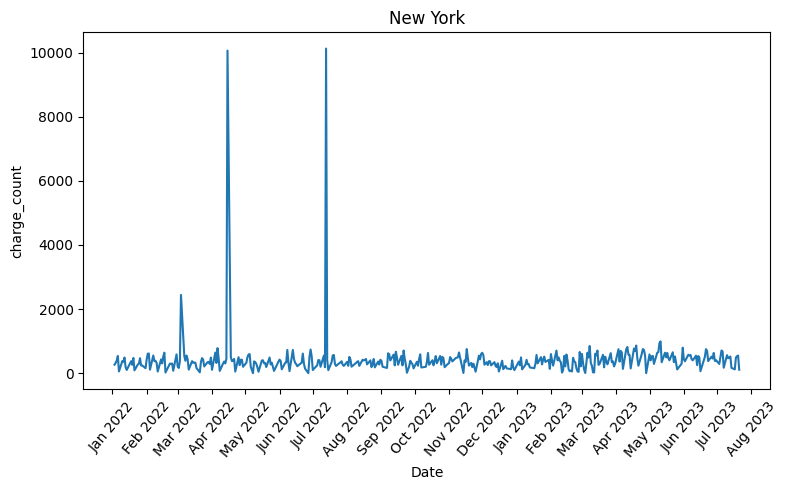

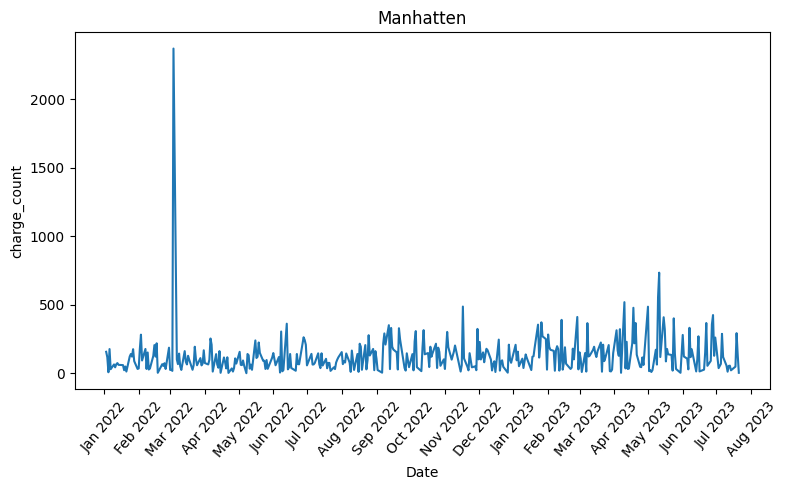

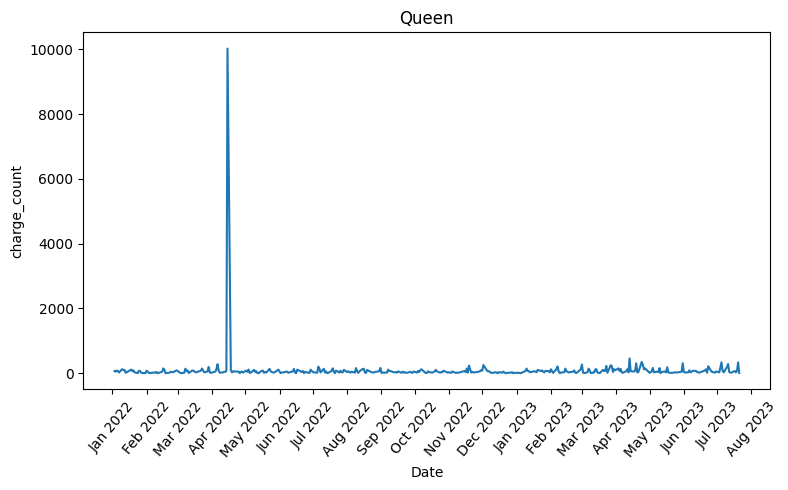

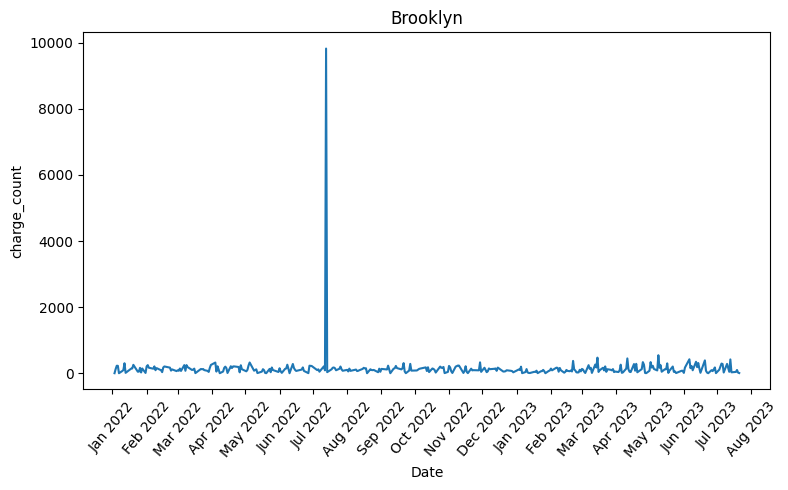

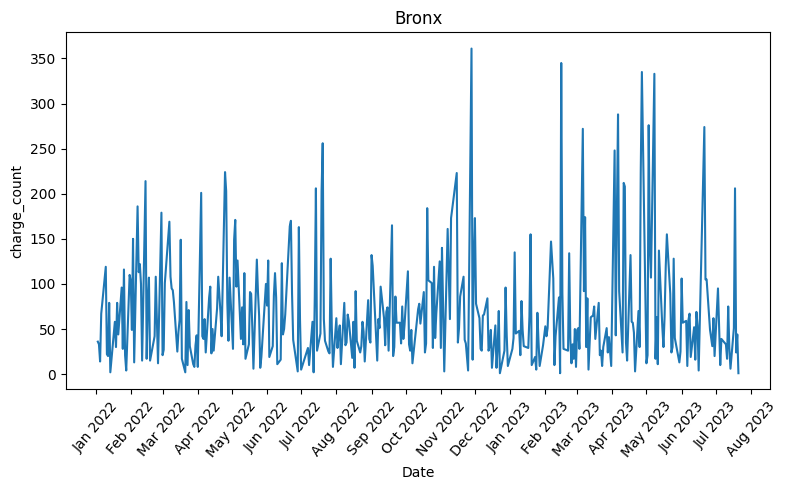

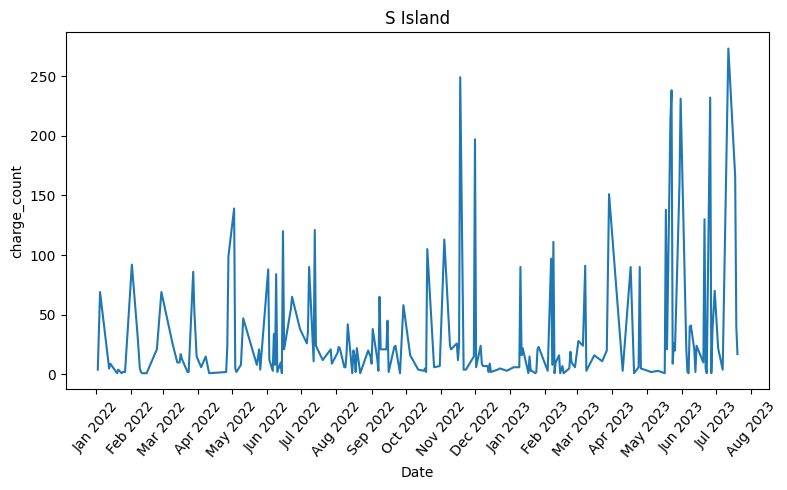

In [230]:
#The following plots all violation_trend# pivot tables.
#We notice that the three big spikes are Manhattan, Queens & Brooklyn (in that order).
#Bronx & Staten Island only comes up between 0-350, the scale of their plots can be deceiving.
timeplot = visual(violation_trend1)
timeplot_1 = timeplot.timeline('violation_date','charge_count','New York')
timeplot = visual(violation_trend2)
timeplot_2 = timeplot.timeline('violation_date','charge_count','Manhatten')
timeplot = visual(violation_trend3)
timeplot_3 = timeplot.timeline('violation_date','charge_count','Queen')
timeplot = visual(violation_trend4)
timeplot_4 = timeplot.timeline('violation_date','charge_count','Brooklyn')
timeplot = visual(violation_trend5)
timeplot_5 = timeplot.timeline('violation_date','charge_count','Bronx')
timeplot = visual(violation_trend6)
timeplot_6 = timeplot.timeline('violation_date','charge_count','S Island')

In [231]:
dealership_df

,record_num,record_type,certificate_number,business_name,violation_date,industry,borough,charge,charge_count,outcome,counts_guilty,building_number,street,city,state,zip,longitude,latitude,counts_settled,counts_not_guilty
4140,9926-2022,ENFO,22Q00192,T & N AUTO DEALERSHIP CORP,2022-03-02,Secondhand Dealer Auto,Queens,6 RCNY § 2-103(g)(1)(v) - DEALER FAILED TO POS...,1,Pleaded,0,3701,CRESCENT ST,LONG IS CITY,NY,11101,-77.519854,40.112489,1,0
4156,9926-2022,ENFO,22Q00192,T & N AUTO DEALERSHIP CORP,2022-03-02,Secondhand Dealer Auto,Queens,6 RCNY § 2-108(a) - BUSINESS FAILS TO POST CON...,1,Pleaded,0,3701,CRESCENT ST,LONG IS CITY,NY,11101,-77.519854,40.112489,1,0
4161,9926-2022,ENFO,22Q00192,T & N AUTO DEALERSHIP CORP,2022-03-02,Secondhand Dealer Auto,Queens,NYC Admin Code § 20-271(b)(1) - BUSINESS FAILS...,1,Pleaded,0,3701,CRESCENT ST,LONG IS CITY,NY,11101,-77.519854,40.112489,1,0
4904,11890-2022,ENFO,22Q00216,ROAD MASTERS II INC,2022-03-11,Secondhand Dealer Auto,Queens,6 RCNY § 2-105(b) - BUSINESS FAILS TO POST TOT...,1,Pleaded,0,6201,FRESH POND RD,MIDDLE VILLAGE,NY,11379,-77.519854,40.112489,1,0
4934,11709-2022,ENFO,22Q00215,ELITE AUTO MALL INC.,2022-03-11,Secondhand Dealer Auto,Queens,NYC Admin Code § 20-271(b)(1) - BUSINESS FAILS...,1,Pleaded,0,6074,METROPOLITAN AVE,RIDGEWOOD,NY,11385,-77.519854,40.112489,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15033,190-2022,LEGL,220013CS,MOUNT EDEN MOTORS INC.,2022-07-25,Secondhand Dealer Auto,Bronx,6 RCNY § 1-13 - NO WRITTEN RESPONSE TO COMPLAINT,1,Default Decision,1,28,W MOUNT EDEN AVE,BRONX,NY,10452,-73.915646,40.844696,0,0
15152,39722-2022,ENFO,22N00628,NHF Holdings Inc.,2022-07-26,Secondhand Dealer Auto,Brooklyn,NYC Admin Code § 20-271(b)(1) - BUSINESS FAILS...,1,Pleaded,0,450,UTICA AVE,BROOKLYN,NY,11203,-77.519854,40.112489,1,0
15170,39722-2022,ENFO,22N00628,NHF Holdings Inc.,2022-07-26,Secondhand Dealer Auto,Brooklyn,6 RCNY § 2-103(g)(1)(ii) - NO ''IMPORTANT NOTI...,1,Pleaded,0,450,UTICA AVE,BROOKLYN,NY,11203,-77.519854,40.112489,1,0
15202,39722-2022,ENFO,22N00628,NHF Holdings Inc.,2022-07-26,Secondhand Dealer Auto,Brooklyn,6 RCNY § 5-75(a) - SELLING OR OFFERING TO SELL...,5,Pleaded,0,450,UTICA AVE,BROOKLYN,NY,11203,-77.519854,40.112489,5,0


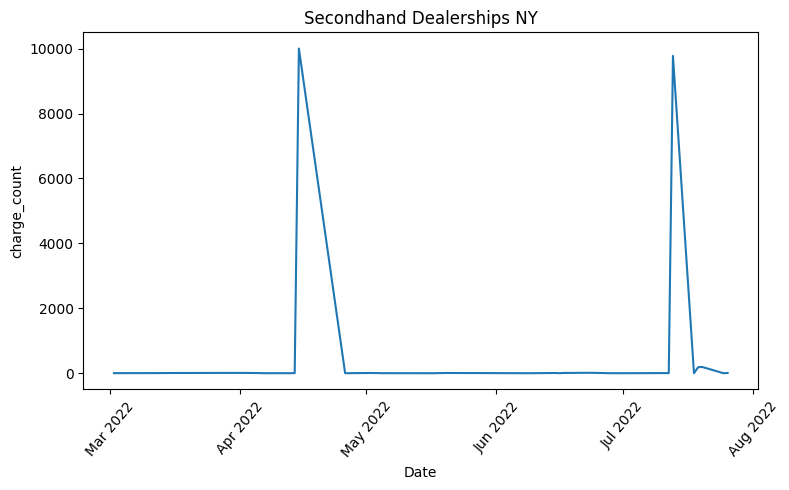

In [232]:
violation_dealership = pd.pivot_table(dealership_df, index = 'violation_date', aggfunc={'charge_count':'sum'})
violation_dealership.reset_index(inplace = True)
visual_dealership = visual(violation_dealership)
timeplot_dealership = visual_dealership.timeline('violation_date','charge_count','Secondhand Dealerships NY')

When we take a look at any compliance updates in 2022 for e-cig and tobacco retailers, Clean Indoor Air Act(CIAA) stands out. This ammends rules on what flavored tobacco containing products can be sold. It also dictates that all retailers must have signs giving warnings on the dangers of vaping.
<br><br>
This may explain part of the disproportionate amounts of charge counts within those two industries overall during this time period.
<br><br>
However, it doesn't seem to explain those major spikes in 2022 April and July. We see the answer to this below when taking a closer look at the Secondhand Dealership Auto industry. This industry has high legal charges of near 10,000 in those two months. But that trend doesn't seem to carry over into 2023 so, we can summize at a glance that actions towards the industry is having an effect.
<br><br>
As for location, when we compare the pattern of spikes and timing between the borough timeline charts, we see a match with Brooklyn and Queens. This means most legal issues with the Secondhand Dealership Auto industry has occurred in those two boroughs. In conclusion DCWP will want to keep a short leash on that industry within the two Boroughs. 

### MAPPING OF ALL LOCATIONS FOR VIOLATIONS ISSUED

In [233]:
#this is required to convert .shp file(s) for the map graphing.
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [234]:
geodata = {'latitude':dcwp_df['latitude'], 'longitude':dcwp_df['longitude']}
geodata_df = pd.DataFrame(geodata)

In [235]:
#Removing out of bound coordinate values by index value.
dropdata = geodata_df[geodata_df['longitude'] < -74.5]
geodata_df.drop(dropdata.index, inplace = True, axis = 0)
#Removing NaN values based on index number.
dropdata = geodata_df[geodata_df['longitude'].isna()]
geodata_df.drop(dropdata.index, inplace = True, axis = 0)

In [236]:
#Checking on na values.
geoedit = dfedit(geodata_df)
geoedit.count_na()

latitude has 0 NaN values
longitude has 0 NaN values


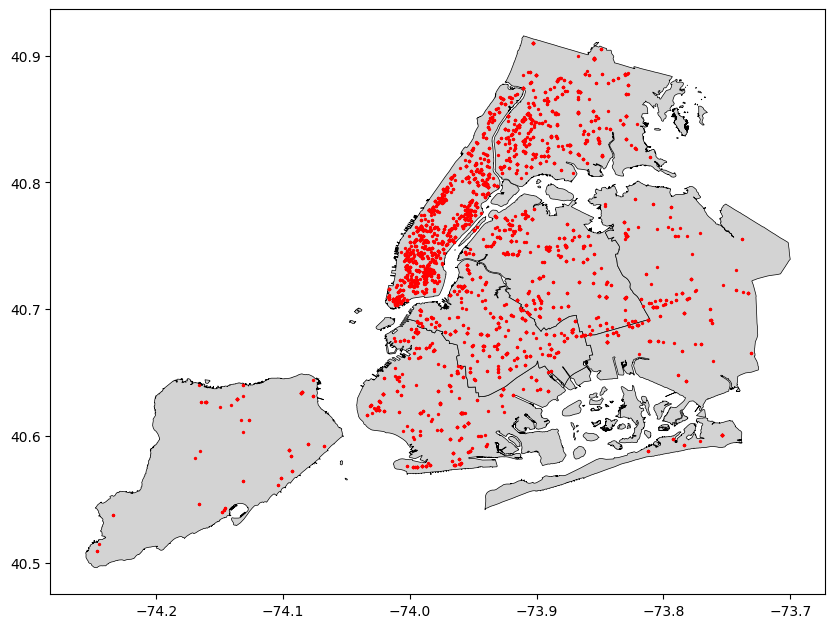

In [237]:
#Refer to the directory where nyczone.shp file is saved for you.
#This file is for the shape of each borough that the longitude and latitude goes to.

#please set directory to where you have the nyczones.shp file located.
states = gpd.read_file("C:/Users/Yuche/Desktop/CIS-3120-DCWP/nyczones.shp")

geo_df = gpd.GeoDataFrame(geodata_df, geometry=gpd.points_from_xy(geodata_df['longitude'], geodata_df['latitude']))
fig, ax = plt.subplots(figsize=(10,10))
states.plot(ax=ax, color='lightgray', edgecolor='black', linewidth = 0.5)
geo_df.plot(ax=ax, color='red', markersize = 2)


plt.show()

The results here reflect the findings from the timeline charts earlier. Theres a lot of clustering within Manhattan but, Manhattan

### MAPPING OF SECONDHAND DEALERSHIP AUTO VIOLATIONS
Interesting that despite having the most charge counts, the locations seem to be very concentrated into a few points on the map for Bronx, Brooklyn and Queens. Nothing in Manhattan!

In [238]:
geodata = {'latitude':dealership_df['latitude'], 'longitude':dealership_df['longitude']}
geodata_df = pd.DataFrame(geodata)

#Removing out of bound coordinate values by index value.
dropdata = geodata_df[geodata_df['longitude'] < -74.5]
geodata_df.drop(dropdata.index, inplace = True, axis = 0)
#Removing NaN values based on index number.
dropdata = geodata_df[geodata_df['longitude'].isna()]
geodata_df.drop(dropdata.index, inplace = True, axis = 0)

In [239]:
#Checking on na values.
geoedit = dfedit(geodata_df)
geoedit.count_na()

latitude has 0 NaN values
longitude has 0 NaN values


<Axes: >

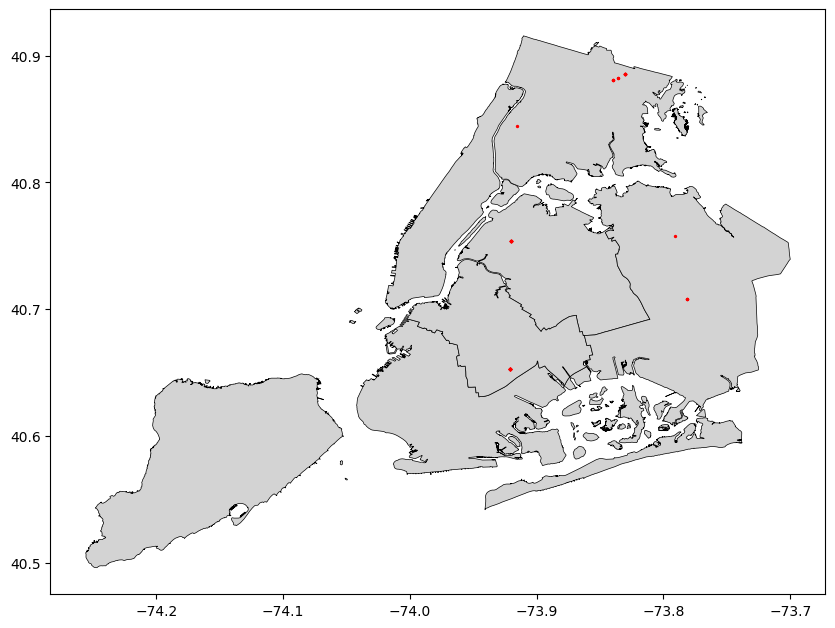

In [240]:
#Refer to the directory where nyczone.shp file is saved for you.
#This file is for the shape of each borough that the longitude and latitude goes to.

#please set directory to where you have the nyczones.shp file located.
states = gpd.read_file("C:/Users/Yuche/Desktop/CIS-3120-DCWP/nyczones.shp")

geo_df = gpd.GeoDataFrame(geodata_df, geometry=gpd.points_from_xy(geodata_df['longitude'], geodata_df['latitude']))
fig, ax = plt.subplots(figsize=(10,10))
states.plot(ax=ax, color='lightgray', edgecolor='black', linewidth = 0.5)
geo_df.plot(ax=ax, color='red', markersize = 2)